# Ex
### Exercise 5.1
- 6, 9, 23, 25, 26

### Exercise 5.2
- 9, 12, 13, 22, 24, 25

### Exercise 5.3
- 2, 6, 11, 12

### Exercise 5.4
- 1, 5, 9, 10, 13, 15

# Com Ex
### Computer Exercise 5.1
- 1, 2

### Computer Exercise 5.2
- 1, 9

### Computer Exercise 5.3
- 1, 7

### Computer Exercise 5.4
- 1, 2, 14

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [4]:
# 5.1 - 1, 2

def trapezoid_uniform(f, a, b, n):
    x = np.linspace(a, b, n + 1)
    h = (b - a) / n
    ret = 0
    
    for i in range(1, n):
        ret += (f(x[i]) + f(x[i - 1])) / 2 * h
        
    return ret

def verify_integral(f, a, b, n = 1000000):
    print(f"trapezoid_uniform({f.__name__}, {a}, {b}, {n}) = {trapezoid_uniform(f, a, b, n)}")
    print(f"scipy.integrate.quad({f.__name__}, {a}, {b}) = {sp.integrate.quad(f, a, b)}")
    print()

f = np.sin

verify_integral(f, 0, np.pi)

f = np.exp

verify_integral(f, 0, 1)

f = np.arctan

verify_integral(f, 0, 1)

trapezoid_uniform(sin, 0, 3.141592653589793, 1000000) = 1.9999999999934266
scipy.integrate.quad(sin, 0, 3.141592653589793) = (2.0, 2.220446049250313e-14)

trapezoid_uniform(exp, 0, 1, 1000000) = 1.7182791101787094
scipy.integrate.quad(exp, 0, 1) = (1.7182818284590453, 1.9076760487502457e-14)

trapezoid_uniform(arctan, 0, 1, 1000000) = 0.4388237877195231
scipy.integrate.quad(arctan, 0, 1) = (0.43882457311747564, 4.87193144846327e-15)



In [5]:
# 5.2 - 1
def romberg(f, a, b, n, m, memo=None):
    if memo is None:
        memo = {}
    
    if (n, m) in memo:
        return memo[(n, m)]
    
    if n == 0 and m == 0:
        result = (b - a) / 2 * (f(a) + f(b))
    elif m == 0:
        h = (b - a) / 2**n
        x = np.linspace(a, b, 2**n + 1)
        result = 1/2 * romberg(f, a, b, n-1, 0, memo) + h * sum(f(x[2*i+1]) for i in range(2**(n-1)))
    else:
        result = (4**m * romberg(f, a, b, n, m-1, memo) - romberg(f, a, b, n-1, m-1, memo)) / (4**m - 1)
    
    memo[(n, m)] = result
    return result


f = lambda x: np.sin(x) / x
n = 8

for i in range(n+1):
    for j in range(i+1):
        print(f"[{i}, {j}] = {romberg(f, 1.3, 2.19, i, j)}\t", end=" ")
    print()
    
print()
print(f"scipy result = {sp.integrate.quad(f, 1.3, 2.19)[0]}")

[0, 0] = 0.4953044734340177	 
[1, 0] = 0.49880688930715666	 [1, 1] = 0.49997436126486966	 
[2, 0] = 0.49967949805781153	 [2, 1] = 0.49997036764136316	 [2, 2] = 0.4999701013997961	 
[3, 0] = 0.4998974639828686	 [3, 1] = 0.499970119291221	 [3, 2] = 0.49997010273454484	 [3, 3] = 0.49997010275573134	 
[4, 0] = 0.4999519438373867	 [4, 1] = 0.4999701037888928	 [4, 2] = 0.49997010275540427	 [4, 3] = 0.4999701027557354	 [4, 4] = 0.49997010275573545	 
[5, 0] = 0.4999655630745738	 [5, 1] = 0.4999701028203028	 [5, 2] = 0.4999701027557302	 [5, 3] = 0.49997010275573533	 [5, 4] = 0.49997010275573533	 [5, 5] = 0.49997010275573533	 
[6, 0] = 0.49996896783847145	 [6, 1] = 0.49997010275977066	 [6, 2] = 0.49997010275573517	 [6, 3] = 0.4999701027557353	 [6, 4] = 0.4999701027557353	 [6, 5] = 0.4999701027557353	 [6, 6] = 0.4999701027557353	 
[7, 0] = 0.4999698190266086	 [7, 1] = 0.4999701027559877	 [7, 2] = 0.4999701027557355	 [7, 3] = 0.4999701027557355	 [7, 4] = 0.4999701027557355	 [7, 5] = 0.499970102755

In [6]:
# 5.2 - 9
f = lambda x: np.sin(x) / np.sqrt(x)
# transform sqrt(x) to u
t = lambda u: 2 * np.sin(u**2)

print(f"romberg result = {romberg(t, 0, 1, 10, 10)}")
print(f"scipy result = {sp.integrate.quad(f, 0, 1)[0]}")

romberg result = 0.620536603446762
scipy result = 0.6205366034467623


simpson_recursive result = 3.14159271465023
scipy result = 3.1415926535897936



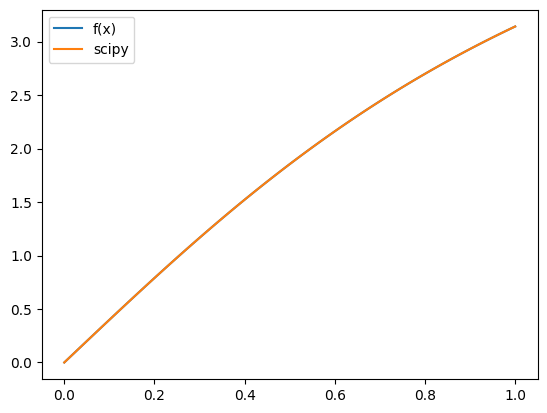

simpson_recursive result = 3.1415926351419774
scipy result = 3.1415926535897936


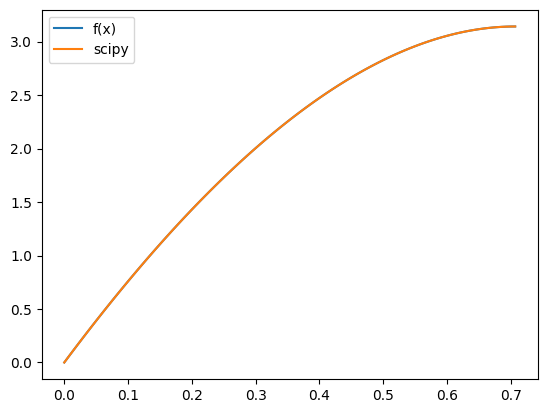

In [29]:
# 5.3 - 1
def simpson_recursive(f, a, b, tol=1e-7, max_iter=100, fa=None, fb=None, fc=None):
    c = (a + b) / 2
    d = (a + c) / 2
    e = (c + b) / 2
    h = b - a
    if fa is None:
        fa = f(a)
    if fb is None:
        fb = f(b)
    if fc is None:
        fc = f(c)
    fd = f(d)
    fe = f(e)
    
    S = h / 6 * (fa + 4 * fc + fb)
    S2 = h / 12 * (fa + 4 * fd + 2 * fc + 4 * fe + fb)
    
    if max_iter <= 0:
        return S2
    
    # Simpson 값의 차이가 허용 오차 내에 있으면 보정값을 추가하여 반환
    if np.abs(S2 - S) < 15 * tol:
        return S2 + (S2 - S) / 15
    else:
        left = simpson_recursive(f, a, c, tol / 2, max_iter - 1, fa, fc, fd)
        right = simpson_recursive(f, c, b, tol / 2, max_iter - 1, fc, fb, fe)
        return left + right

f = lambda x: 4 * (1 / (1 + x**2))
x = np.linspace(0, 1, 100)
print(f"simpson_recursive result = {simpson_recursive(f, 0, 1, 5e-6, 4)}")
print(f"scipy result = {sp.integrate.quad(f, 0, 1)[0]}")
print()

plt.plot(x, [simpson_recursive(f, 0, x, 5e-6, 4) for x in x], label="f(x)")
plt.plot(x, [sp.integrate.quad(f, 0, x)[0] for x in x], label="scipy")
plt.legend()
plt.show()

f = lambda x: 8 * (np.sqrt(1 - x**2) - x)
x = np.linspace(0, 1 / np.sqrt(2), 100)
print(f"simpson_recursive result = {simpson_recursive(f, 0, 1 / np.sqrt(2), 5e-6, 4)}")
print(f"scipy result = {sp.integrate.quad(f, 0, 1 / np.sqrt(2))[0]}")

plt.plot(x, [simpson_recursive(f, 0, x, 5e-6, 4) for x in x], label="f(x)")
plt.plot(x, [sp.integrate.quad(f, 0, x)[0] for x in x], label="scipy")
plt.legend()
plt.show()

In [41]:
# 5.3 - 7
def compute_open_newton_cotes_weights(n):
    weights = np.zeros(n)
    for i in range(n):
        nodes = [j for j in range(1, n+1) if j != (i+1)]
        poly = np.poly1d([1])
        denom = 1.0
        for j in nodes:
            poly = np.poly1d(np.convolve(poly.coeffs, [1, -j]))
            denom *= ((i+1) - j)
        L_poly = poly / denom
        L_poly_integ = L_poly.integ()
        weight = L_poly_integ(n+1) - L_poly_integ(0)
        weights[i] = weight
    return weights

def newton_cotes_open(f, a, b, n):
    h = (b - a) / (n + 1)
    weights = compute_open_newton_cotes_weights(n)
    
    x_points = np.array([a + (i+1) * h for i in range(n)])
    f_values = f(x_points)
    
    integral_approx = h * np.sum(weights * f_values)
    return integral_approx

f = lambda x :  1 / np.sqrt(1 + x ** 2)
for i in range (1, 11):
    print(f"newton-cotes {i} point = {newton_cotes_open(f, -1, 1, i)}")
print(f"scipy result = {sp.integrate.quad(f, -1, 1)[0]}")

newton-cotes 1 point = 2.0
newton-cotes 2 point = 1.8973665961010273
newton-cotes 3 point = 1.7184725093331088
newton-cotes 4 point = 1.7355004764214979
newton-cotes 5 point = 1.7741974130017728
newton-cotes 6 point = 1.769916854851821
newton-cotes 7 point = 1.7593624977986235
newton-cotes 8 point = 1.7606111061474599
newton-cotes 9 point = 1.763825880196745
newton-cotes 10 point = 1.763430971288931
scipy result = 1.7627471740390868


In [61]:
# 5.4 - 1
def gauss_legendre_quadrature(f, a, b, n):
    nodes, weights = np.polynomial.legendre.leggauss(n)
    transformed_nodes = 0.5 * (nodes * (b - a) + (b + a))
    transformed_weights = 0.5 * (b - a) * weights
    integral = np.sum(transformed_weights * f(transformed_nodes))
    return integral

In [64]:
# 5.4 - 2
f = lambda x: 1 / np.sqrt(x)

print(f"gauss_legendre result = {gauss_legendre_quadrature(f, 0, 1, 2)}")
print(f"scipy result = {sp.integrate.quad(f, 0, 1)[0]}")

f = lambda x: np.exp(-(np.cos(x)) ** 2) 

print(f"gauss_legendre result = {gauss_legendre_quadrature(f, 0, 2, 2)}")
print(f"scipy result = {sp.integrate.quad(f, 0, 2)[0]}")

gauss_legendre result = 1.6506801238857844
scipy result = 1.9999999999999984
gauss_legendre result = 1.4352423337800495
scipy result = 1.4183020657958605


In [68]:
# 5.4 - 14

f = lambda x: 1 / np.sqrt(1 - x ** 2)

print(f"gauss_legendre result = {gauss_legendre_quadrature(f, -1, 1, 1000)}")
print(f"scipy result = {sp.integrate.quad(f, -1, 1)[0]}")

gauss_legendre result = 3.1398521435955216
scipy result = 3.141592653589591
